In [1]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

df = pd.read_csv('labeled_CIU.csv', encoding="ISO-8859-1")

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'#','',text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    tokens = [token for token in tokens if token not in stop_words]

    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # join tokens to form sentence
    text = ' '.join(tokens)
    return text


# apply the preprocessing to 'Tweet' column
df['Tweet'] = df['Tweet'].apply(preprocess_text)

# save the dataset to CSV file
df.to_csv('clean_labeled_CIU.csv', index=False, encoding='utf-8')


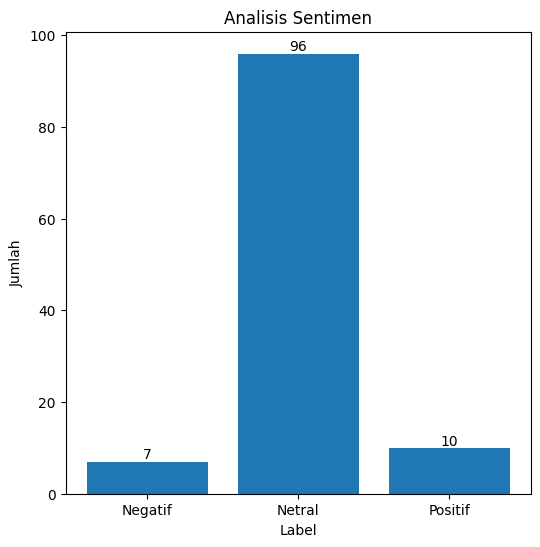

In [2]:
import matplotlib.pyplot as plt
import numpy as np

class_labels = ['Negatif','Netral','Positif']
class_counts = np.unique(df['Label'],return_counts=True)[1]
plt.figure(figsize=(6,6))
bars = plt.bar(class_labels,class_counts)
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.title("Analisis Sentimen")
for bar, count in zip(bars, class_counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval), ha='center', va='bottom')

plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd

df = pd.read_csv('clean_labeled_CIU.csv')

class_labels = ['Negatif','Netral','Positif']
class_counts = np.unique(df['Label'],return_counts=True)[1]

# Create a DataFrame for Plotly Treemap
treemap_data = pd.DataFrame({
    'Label': class_labels,
    'Count': class_counts
})

# Create Treemap chart using Plotly Express
fig = px.treemap(treemap_data, path=['Label'], values='Count', title='Sentiment Analysis', custom_data=['Count'], height=600, width=800, hover_data={'Count':':,d'})
fig.update_traces(textinfo='label+text', selector=dict(type='treemap'))
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))  # Optional: Adjust layout margins
 

# Show the Plotly Treemap
fig.show()

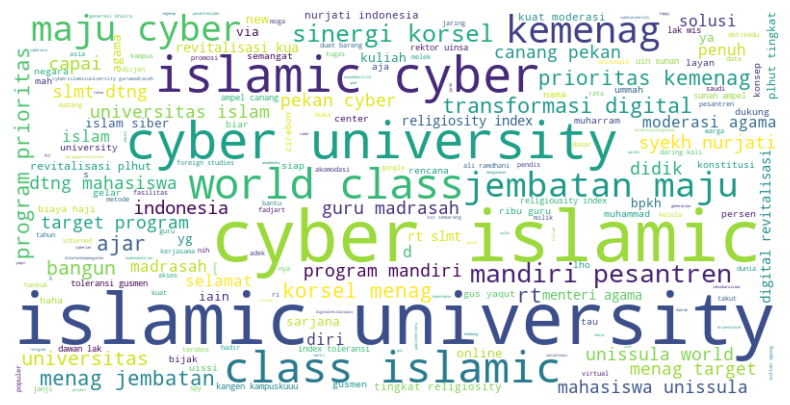

In [9]:
from wordcloud import WordCloud

all_text = ' '.join(df['Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
import pandas as pd

df = pd.read_csv('labeled_CIU.csv')

# Assuming 'df' is your DataFrame
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Save the modified DataFrame to an Excel file
df.to_excel('dated_dataset.xlsx', index=False)


C:\Users\Naufal\AppData\Local\Temp\ipykernel_7188\188034389.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Month'] = df_2021['Date'].dt.to_period('M')


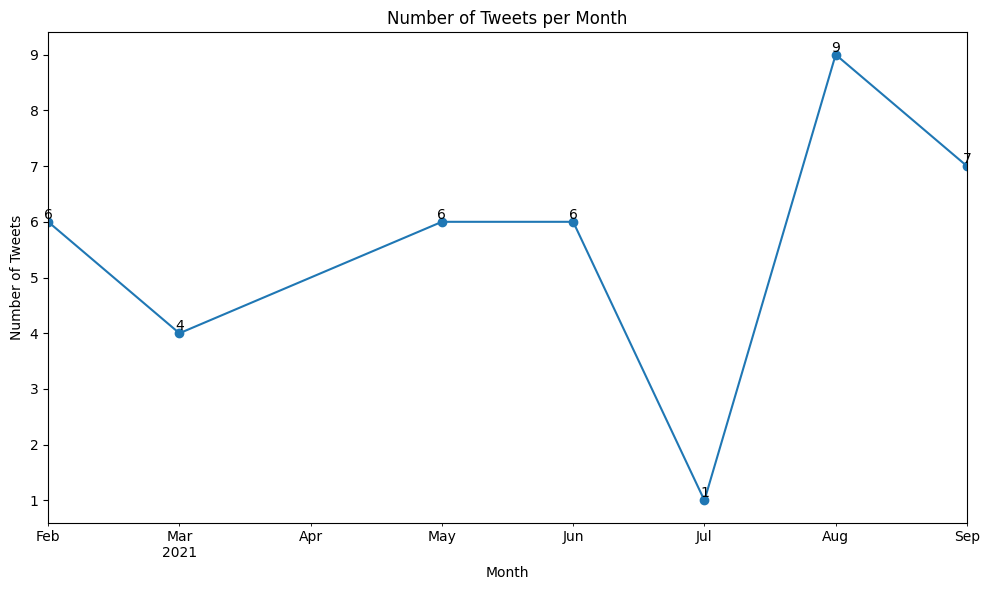

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your modified DataFrame
df = pd.read_excel('dated_dataset.xlsx')

# Convert 'Date' column to datetime without specifying a format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the year 2021
df_2021 = df[df['Date'].dt.year == 2021]

# Extract month and year
df_2021['Month'] = df_2021['Date'].dt.to_period('M')

# Group by month and count the tweets
tweets_per_month = df_2021.groupby('Month').size()

# Plotting the data as a line chart
plt.figure(figsize=(10, 6))
tweets_per_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Month')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels on each data point
for i, txt in enumerate(tweets_per_month):
    plt.annotate(txt, (tweets_per_month.index.astype(str)[i], tweets_per_month[i]), ha='center', va='bottom')

plt.show()


C:\Users\Naufal\AppData\Local\Temp\ipykernel_7188\1993088883.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_to_2023['Month'] = df_2021_to_2023['Date'].dt.to_period('M')


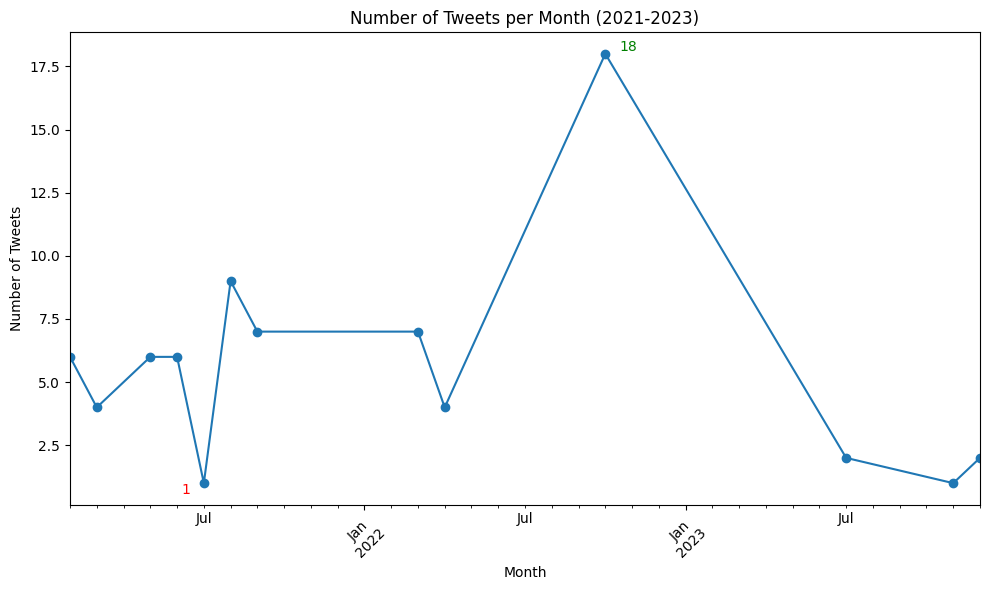

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your modified DataFrame
df = pd.read_excel('dated_dataset.xlsx')

# Convert 'Date' column to datetime without specifying a format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the years 2021 to 2023
df_2021_to_2023 = df[(df['Date'].dt.year >= 2021) & (df['Date'].dt.year <= 2023)]

# Extract month and year
df_2021_to_2023['Month'] = df_2021_to_2023['Date'].dt.to_period('M')

# Group by month and count the tweets
tweets_per_month = df_2021_to_2023.groupby('Month').size()

# Plotting the data as a line chart
plt.figure(figsize=(10, 6))
tweets_per_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Month (2021-2023)')
plt.xticks(rotation=45)
plt.tight_layout()

# Find indices of the highest and lowest values
max_index = tweets_per_month.idxmax()
min_index = tweets_per_month.idxmin()

# Add labels on the highest and lowest points
plt.annotate(tweets_per_month[max_index], (max_index.strftime('%Y-%m'), tweets_per_month[max_index]),
             ha='left', va='bottom', xytext=(10, 0), textcoords='offset points', color='green', fontsize=10)
plt.annotate(tweets_per_month[min_index], (min_index.strftime('%Y-%m'), tweets_per_month[min_index]),
             ha='right', va='top', xytext=(-10, 0), textcoords='offset points', color='red', fontsize=10)

plt.show()


C:\Users\Naufal\AppData\Local\Temp\ipykernel_2492\2890899702.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Month'] = df_2021['Date'].dt.to_period('M')


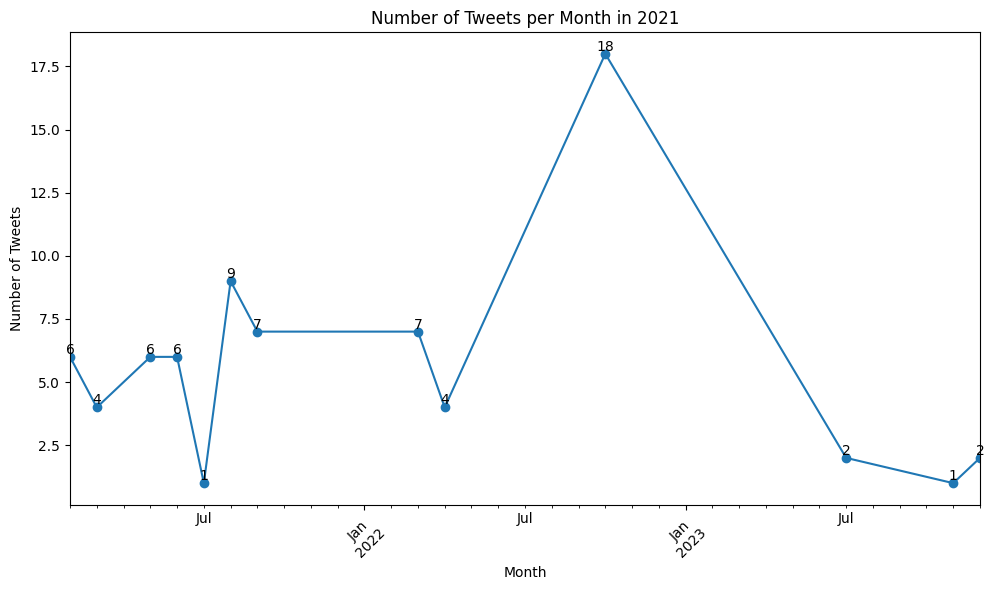

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your modified DataFrame
df = pd.read_excel('dated_dataset.xlsx')

# Convert 'Date' column to datetime without specifying a format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the year 2021

df_2021 = df[(df['Date'].dt.year >= 2021) & (df['Date'].dt.year <= 2023)]

# Extract month and year
df_2021['Month'] = df_2021['Date'].dt.to_period('M')

# Group by month and count the tweets
tweets_per_month = df_2021.groupby('Month').size()

# Plotting the data as a line chart
plt.figure(figsize=(10, 6))
tweets_per_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Month in 2021')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels on each data point
for i, txt in enumerate(tweets_per_month):
    plt.annotate(txt, (tweets_per_month.index.astype(str)[i], tweets_per_month[i]), ha='center', va='bottom')

plt.show()


In [6]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Assuming 'df' is your labeled dataset DataFrame
df = pd.read_csv('labeled_CIU.csv')

# Download NLTK stopwords data
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))

# Function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return filtered_tokens

# Tokenize and remove stopwords for each row in the dataset
df['Tokenized_Text'] = df['Tweet'].apply(tokenize_and_remove_stopwords)

# Count word frequency for each label
label_words_frequency = {}

for label in df['Label'].unique():
    label_df = df[df['Label'] == label]
    all_tokens = [token for tokens in label_df['Tokenized_Text'] for token in tokens]
    word_counts = Counter(all_tokens)
    label_words_frequency[label] = word_counts.most_common(20)

# Display the results
for label, words_frequency in label_words_frequency.items():
    print(f"Top 20 words for label '{label}': {words_frequency}")


Top 20 words for label '0': [('cyber', 96), ('islamic', 94), ('university', 93), ('https', 82), ('di', 26), ('kemenag', 24), ('menag', 22), ('dengan', 20), ('dan', 18), ('majukan', 17), ('world', 17), ('class', 17), ('pesantren', 16), ('korsel', 16), ('jembatan', 16), ('kemandirian', 15), ('tahun', 15), ('program', 14), ('ini', 13), ('untuk', 12)]
Top 20 words for label '1': [('university', 11), ('cyber', 10), ('islamic', 10), ('class', 6), ('kemenag', 4), ('islam', 4), ('world', 4), ('dan', 3), ('juga', 3), ('universitas', 3), ('unissula', 3), ('bpkh', 2), ('mengelola', 2), ('pesantren', 2), ('itu', 2), ('https', 2), ('di', 2), ('seluruh', 2), ('akan', 2), ('punya', 2)]
Top 20 words for label '-1': [('cyber', 8), ('university', 8), ('islamic', 7), ('yang', 3), ('world', 3), ('class', 3), ('kampus', 2), ('kita', 2), ('jadi', 2), ('yg', 2), ('bukan', 2), ('tapi', 2), ('masih', 2), ('ini', 2), ('tugas', 2), ('menakutkan', 2), ('rt', 2), ('sudah', 1), ('mendaftar', 1), ('hanya', 1)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naufal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naufal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd

# Read the dataset from the CSV file
df = pd.read_csv('labeled_CIU.csv')

# Define the keywords you want to count
keywords_to_count = ['yaqut', 'ali ramdhani', 'ahmad zainul','amien suyitno','sumanta hasyim']

# Convert 'Tweet' column to lowercase for case-insensitive matching
df['Tweet'] = df['Tweet'].str.lower()

# Count the frequency of each keyword in the 'Tweet' column
keyword_counts = {keyword: df['Tweet'].str.contains(keyword).sum() for keyword in keywords_to_count}

# Display the frequency of each keyword
for keyword, count in keyword_counts.items():
    print(f'{keyword}: {count} times')


yaqut: 9 times
ali ramdhani: 2 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times


In [3]:
import json
import re
from collections import Counter

# Read the dataset from the JSON file
with open('cnn_full.json', 'r') as json_file:
    data = json.load(json_file)

# Iterate over each article in the list
for article_data in data:
    # Extract the "Article_Text" from the article data
    article_text = article_data.get('Article_Text', '')

    # Define the keywords you want to count
    keywords_to_count = ['yaqut', 'ali ramdhani', 'ahmad zainul','amien suyitno','sumanta hasyim']

    # Convert the text to lowercase for case-insensitive matching
    cleaned_text = re.sub(r'\W', ' ', article_text.lower())

    # Tokenize the text
    tokens = cleaned_text.split()

    # Count the frequency of each keyword in the text
    keyword_counts = Counter({keyword: tokens.count(keyword) for keyword in keywords_to_count})

    # Display the frequency of each keyword for the current article
    print(f'Article URL: {article_data.get("URL")}')
    for keyword, count in keyword_counts.items():
        print(f'{keyword}: {count} times')

    # Total frequency for the current article
    total_frequency = sum(keyword_counts.values())
    print(f'Total Frequency: {total_frequency} times\n')


Article URL: https://www.cnnindonesia.com/nasional/20210902145107-20-688851/menag-bangun-cyber-islamic-university-100-persen-online
yaqut: 9 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 9 times



In [4]:
import json
import re
from collections import Counter

# Read the dataset from the JSON file
with open('detik_full.json', 'r') as json_file:
    data = json.load(json_file)

# Iterate over each article in the list
for article_data in data:
    # Extract the "Article_Text" from the article data
    article_text = article_data.get('Article_Text', '')

    # Define the keywords you want to count
    keywords_to_count = ['yaqut', 'ali ramdhani', 'ahmad zainul','amien suyitno','sumanta hasyim']

    # Convert the text to lowercase for case-insensitive matching
    cleaned_text = re.sub(r'\W', ' ', article_text.lower())

    # Tokenize the text
    tokens = cleaned_text.split()

    # Count the frequency of each keyword in the text
    keyword_counts = Counter({keyword: tokens.count(keyword) for keyword in keywords_to_count})

    # Display the frequency of each keyword for the current article
    print(f'Article URL: {article_data.get("URL")}')
    for keyword, count in keyword_counts.items():
        print(f'{keyword}: {count} times')

    # Total frequency for the current article
    total_frequency = sum(keyword_counts.values())
    print(f'Total Frequency: {total_frequency} times\n')


Article URL: https://www.detik.com/hikmah/khazanah/d-7041192/universitas-islam-siber-mudahkan-guru-di-pelosok-untuk-kuliah
yaqut: 1 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 1 times

Article URL: https://www.detik.com/hikmah/khazanah/d-7055632/menag-yaqut-serahkan-98-972-sk-inpassing-di-hari-guru-nasional-2023
yaqut: 10 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 10 times

Article URL: https://www.detik.com/hikmah/khazanah/d-6945897/9-layanan-digital-kemenag-pusaka-superapps-hingga-quran-isyarat
yaqut: 7 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 7 times



In [5]:
import json
import re
from collections import Counter

# Read the dataset from the JSON file
with open('fajarcirebon_full.json', 'r') as json_file:
    data = json.load(json_file)

# Iterate over each article in the list
for article_data in data:
    # Extract the "Article_Text" from the article data
    article_text = article_data.get('Article_Text', '')

    # Define the keywords you want to count
    keywords_to_count = ['yaqut', 'ali ramdhani', 'ahmad zainul','amien suyitno','sumanta hasyim']

    # Convert the text to lowercase for case-insensitive matching
    cleaned_text = re.sub(r'\W', ' ', article_text.lower())

    # Tokenize the text
    tokens = cleaned_text.split()

    # Count the frequency of each keyword in the text
    keyword_counts = Counter({keyword: tokens.count(keyword) for keyword in keywords_to_count})

    # Display the frequency of each keyword for the current article
    print(f'Article URL: {article_data.get("URL")}')
    for keyword, count in keyword_counts.items():
        print(f'{keyword}: {count} times')

    # Total frequency for the current article
    total_frequency = sum(keyword_counts.values())
    print(f'Total Frequency: {total_frequency} times\n')


Article URL: https://fajarcirebon.com/rektor-iain-cirebon-wisuda-1-532-mahasiswa-cyber-islamic-university-konsep-kampus-masa-depan/
yaqut: 1 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 1 times



In [6]:
import json
import re
from collections import Counter

# Read the dataset from the JSON file
with open('kemenag_full.json', 'r') as json_file:
    data = json.load(json_file)

# Iterate over each article in the list
for article_data in data:
    # Extract the "Article_Text" from the article data
    article_text = article_data.get('Article_Text', '')

    # Define the keywords you want to count
    keywords_to_count = ['yaqut', 'ali ramdhani', 'ahmad zainul','amien suyitno','sumanta hasyim']

    # Convert the text to lowercase for case-insensitive matching
    cleaned_text = re.sub(r'\W', ' ', article_text.lower())

    # Tokenize the text
    tokens = cleaned_text.split()

    # Count the frequency of each keyword in the text
    keyword_counts = Counter({keyword: tokens.count(keyword) for keyword in keywords_to_count})

    # Display the frequency of each keyword for the current article
    print(f'Article URL: {article_data.get("URL")}')
    for keyword, count in keyword_counts.items():
        print(f'{keyword}: {count} times')

    # Total frequency for the current article
    total_frequency = sum(keyword_counts.values())
    print(f'Total Frequency: {total_frequency} times\n')


Article URL: https://kemenag.go.id/nasional/kemenag-matangkan-konsep-pembelajaran-cyber-islamic-university-pkv454
yaqut: 1 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 1 times

Article URL: https://kemenag.go.id/nasional/menag-minta-target-program-kemandirian-pesantren-dan-cyber-islamic-university-tercapai-tahun-ini-5j3pwj
yaqut: 4 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 4 times



In [7]:
import json
import re
from collections import Counter

# Read the dataset from the JSON file
with open('nu_full.json', 'r') as json_file:
    data = json.load(json_file)

# Iterate over each article in the list
for article_data in data:
    # Extract the "Article_Text" from the article data
    article_text = article_data.get('Article_Text', '')

    # Define the keywords you want to count
    keywords_to_count = ['yaqut', 'ali ramdhani', 'ahmad zainul','amien suyitno','sumanta hasyim']

    # Convert the text to lowercase for case-insensitive matching
    cleaned_text = re.sub(r'\W', ' ', article_text.lower())

    # Tokenize the text
    tokens = cleaned_text.split()

    # Count the frequency of each keyword in the text
    keyword_counts = Counter({keyword: tokens.count(keyword) for keyword in keywords_to_count})

    # Display the frequency of each keyword for the current article
    print(f'Article URL: {article_data.get("URL")}')
    for keyword, count in keyword_counts.items():
        print(f'{keyword}: {count} times')

    # Total frequency for the current article
    total_frequency = sum(keyword_counts.values())
    print(f'Total Frequency: {total_frequency} times\n')


Article URL: https://www.nu.or.id/nasional/iain-syekh-nurjati-cirebon-ptkin-di-kota-wali-yang-jadi-percontohan-cyber-islamic-university-TdRGP
yaqut: 0 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 0 times



In [8]:
import json
import re
from collections import Counter

# Read the dataset from the JSON file
with open('republika_full.json', 'r') as json_file:
    data = json.load(json_file)

# Iterate over each article in the list
for article_data in data:
    # Extract the "Article_Text" from the article data
    article_text = article_data.get('Article_Text', '')

    # Define the keywords you want to count
    keywords_to_count = ['yaqut', 'ali ramdhani', 'ahmad zainul','amien suyitno','sumanta hasyim']

    # Convert the text to lowercase for case-insensitive matching
    cleaned_text = re.sub(r'\W', ' ', article_text.lower())

    # Tokenize the text
    tokens = cleaned_text.split()

    # Count the frequency of each keyword in the text
    keyword_counts = Counter({keyword: tokens.count(keyword) for keyword in keywords_to_count})

    # Display the frequency of each keyword for the current article
    print(f'Article URL: {article_data.get("URL")}')
    for keyword, count in keyword_counts.items():
        print(f'{keyword}: {count} times')

    # Total frequency for the current article
    total_frequency = sum(keyword_counts.values())
    print(f'Total Frequency: {total_frequency} times\n')


Article URL: https://khazanah.republika.co.id/berita/r4kdm9349/capaian-setahun-menag-yaqut-cyber-islamic-university
yaqut: 7 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 7 times

Article URL: https://khazanah.republika.co.id/berita/s4f77i451/kemenag-buka-universitas-islam-siber-permudah-guru-akses-kuliah?
yaqut: 0 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 0 times

Article URL: https://republika.co.id/berita/r42bfc320/iain-cirebon-akan-dikukuhkan-sebagai-kampus-siber-uissi
yaqut: 0 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 0 times



In [9]:
import json
import re
from collections import Counter

# Read the dataset from the JSON file
with open('syekhnurjati_full.json', 'r') as json_file:
    data = json.load(json_file)

# Iterate over each article in the list
for article_data in data:
    # Extract the "Article_Text" from the article data
    article_text = article_data.get('Article_Text', '')

    # Define the keywords you want to count
    keywords_to_count = ['yaqut', 'ali ramdhani', 'ahmad zainul','amien suyitno','sumanta hasyim']

    # Convert the text to lowercase for case-insensitive matching
    cleaned_text = re.sub(r'\W', ' ', article_text.lower())

    # Tokenize the text
    tokens = cleaned_text.split()

    # Count the frequency of each keyword in the text
    keyword_counts = Counter({keyword: tokens.count(keyword) for keyword in keywords_to_count})

    # Display the frequency of each keyword for the current article
    print(f'Article URL: {article_data.get("URL")}')
    for keyword, count in keyword_counts.items():
        print(f'{keyword}: {count} times')

    # Total frequency for the current article
    total_frequency = sum(keyword_counts.values())
    print(f'Total Frequency: {total_frequency} times\n')


Article URL: https://info.syekhnurjati.ac.id/cyber-islamic-university-universitas-islam-siber-penuhi-janti-konstitusi/
yaqut: 0 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 0 times

Article URL: https://info.syekhnurjati.ac.id/iain-syekh-nurjati-cirebon-ditunjuk-sebagai-kampus-cyber-islamic-university/
yaqut: 0 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 0 times

Article URL: https://info.syekhnurjati.ac.id/cyber-islamic-university-perkuat-transformasi-iain-syekh-nurjati-cirebon/
yaqut: 0 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 0 times

Article URL: https://info.syekhnurjati.ac.id/iain-cirebon-dan-pt-al-masoem-muamalah-mandiri-berkolaborasi-lahirkan-uin-cyber-dalam-kemasan-air-mineral/
yaqut: 0 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta ha

In [10]:
import json
import re
from collections import Counter

# Read the dataset from the JSON file
with open('tvone_full.json', 'r') as json_file:
    data = json.load(json_file)

# Iterate over each article in the list
for article_data in data:
    # Extract the "Article_Text" from the article data
    article_text = article_data.get('Article_Text', '')

    # Define the keywords you want to count
    keywords_to_count = ['yaqut', 'ali ramdhani', 'ahmad zainul','amien suyitno','sumanta hasyim']

    # Convert the text to lowercase for case-insensitive matching
    cleaned_text = re.sub(r'\W', ' ', article_text.lower())

    # Tokenize the text
    tokens = cleaned_text.split()

    # Count the frequency of each keyword in the text
    keyword_counts = Counter({keyword: tokens.count(keyword) for keyword in keywords_to_count})

    # Display the frequency of each keyword for the current article
    print(f'Article URL: {article_data.get("URL")}')
    for keyword, count in keyword_counts.items():
        print(f'{keyword}: {count} times')

    # Total frequency for the current article
    total_frequency = sum(keyword_counts.values())
    print(f'Total Frequency: {total_frequency} times\n')


Article URL: https://www.tvonenews.com/berita/167364-kementerian-agama-buka-universitas-islam-siber
yaqut: 0 times
ali ramdhani: 0 times
ahmad zainul: 0 times
amien suyitno: 0 times
sumanta hasyim: 0 times
Total Frequency: 0 times



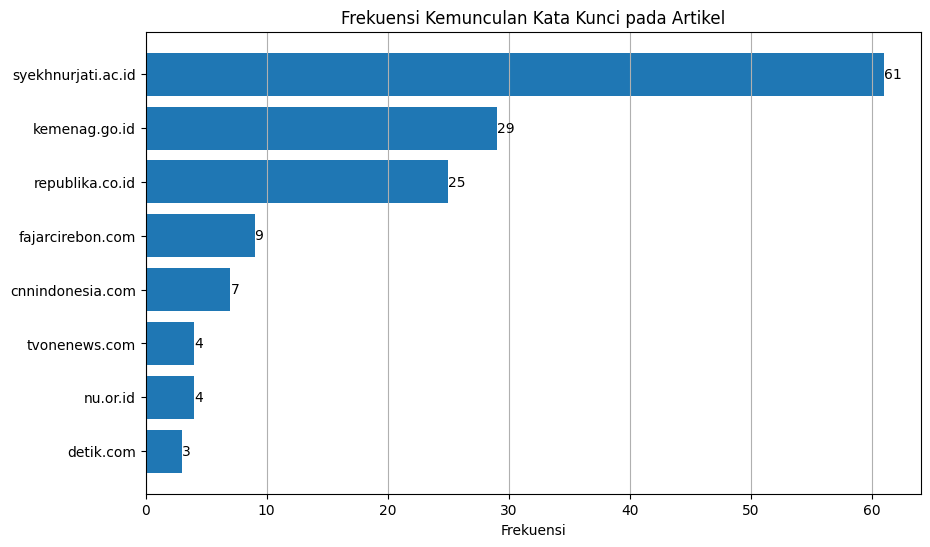

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset dari file CSV
df = pd.read_csv('frekuensi_artikel.csv')

# Mengurutkan DataFrame berdasarkan kolom 'Frekuensi' secara menurun
df = df.sort_values(by='Frekuensi', ascending=True)

# Membuat horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(df['Artikel'], df['Frekuensi'])

# Menambahkan label pada setiap batang
for bar, freq in zip(bars, df['Frekuensi']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(freq), ha='left', va='center')

# Menyusun tata letak
plt.xlabel('Frekuensi')
plt.title('Frekuensi Kemunculan Kata Kunci pada Artikel')
plt.grid(axis='x')

# Menampilkan plot
plt.show()


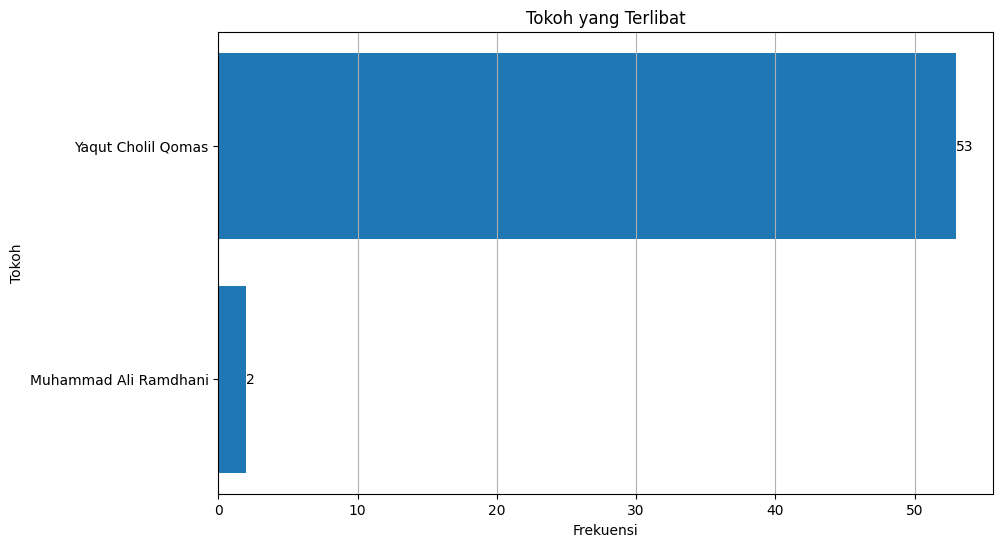

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from the CSV file
df = pd.read_csv('tokoh.csv')

# Sort the DataFrame by the 'jumlah' column in descending order
df_sorted = df.sort_values(by='jumlah', ascending=True)

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['tokoh'], df_sorted['jumlah'])
plt.xlabel('Frekuensi')
plt.ylabel('Tokoh')
plt.title('Tokoh yang Terlibat')
plt.grid(axis='x')  # Add grid lines for better readability

# Display the values as labels on the bars
for bar, label in zip(bars, df_sorted['jumlah']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(label), ha='left', va='center')

# Display the plot
plt.show()
